Saving Sample_Accident_Data.csv to Sample_Accident_Data.csv


/tmp/ipython-input-1-1903506324.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='plasma')


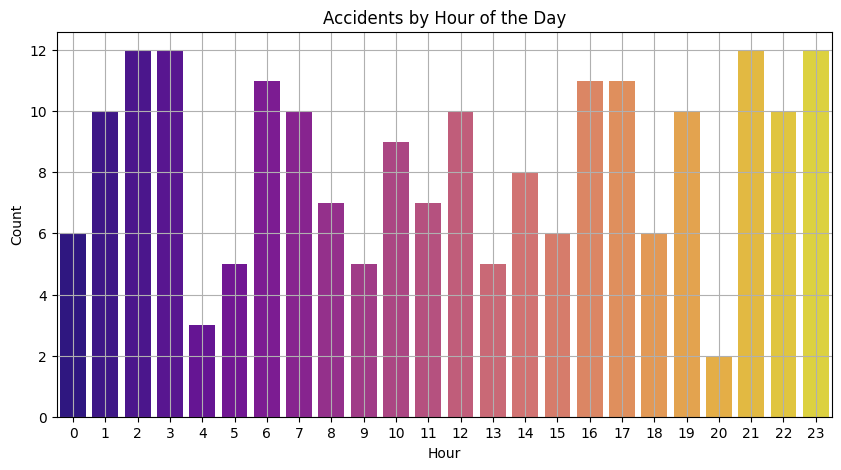

/tmp/ipython-input-1-1903506324.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Set2')


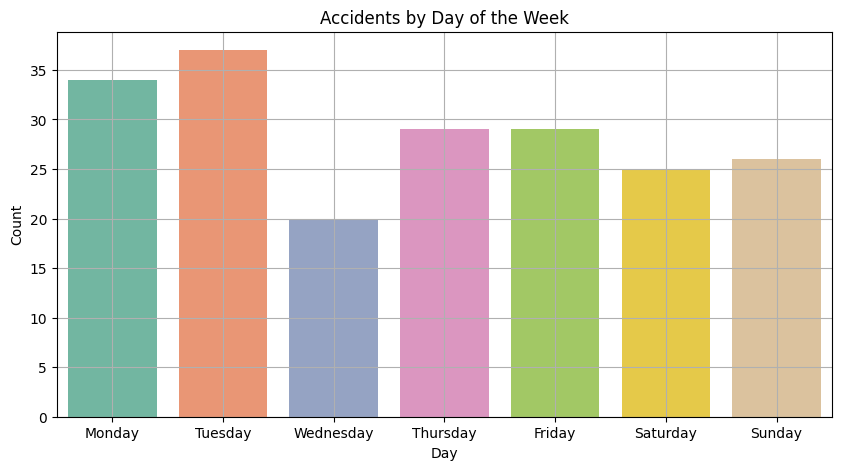

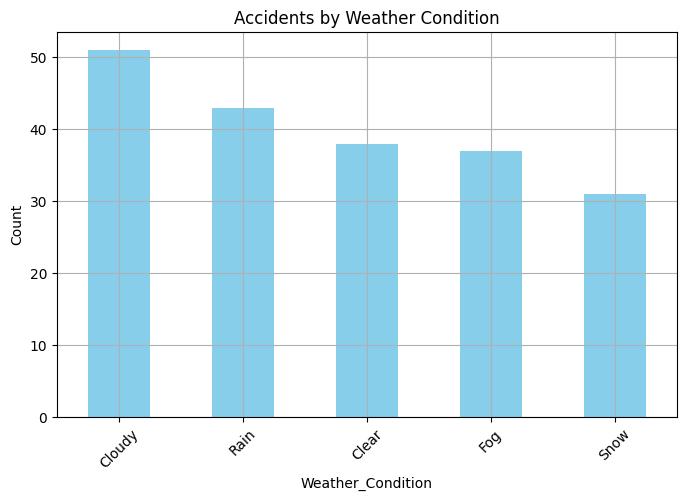

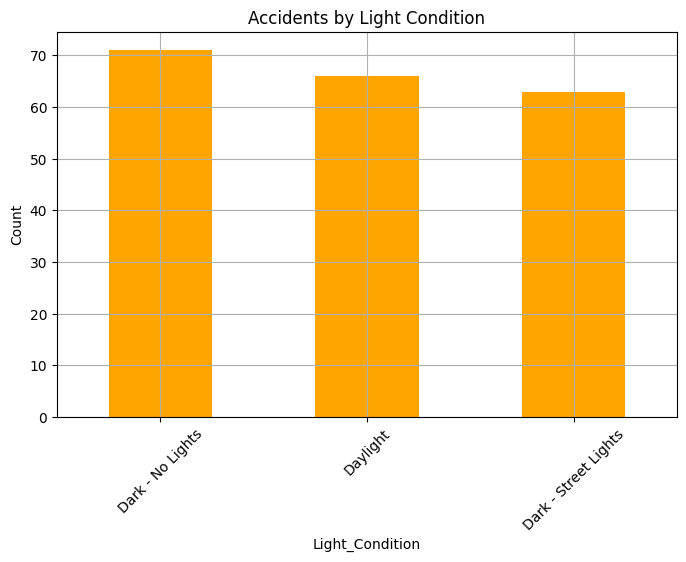

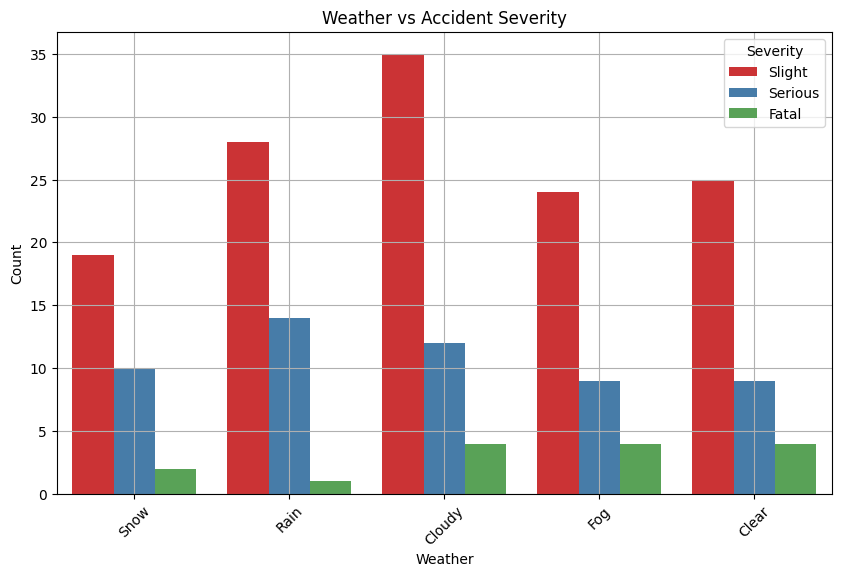

In [1]:
# 🚦 TASK 04 – Traffic Accident Analysis (with file upload)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 1️⃣ Upload File (for Google Colab users)
from google.colab import files
uploaded = files.upload()

# 2️⃣ Read the uploaded CSV (replace with your file name if needed)
df = pd.read_csv("Sample_Accident_Data.csv")

# 3️⃣ Date processing
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Hour'] = df['Date_Time'].dt.hour
df['Day'] = df['Date_Time'].dt.day_name()

# 4️⃣ Accidents by Hour
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='plasma')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 5️⃣ Accidents by Day
plt.figure(figsize=(10, 5))
sns.countplot(x='Day', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Set2')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 6️⃣ Weather Condition Distribution
plt.figure(figsize=(8, 5))
df['Weather_Condition'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Accidents by Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 7️⃣ Light Conditions
plt.figure(figsize=(8, 5))
df['Light_Condition'].value_counts().plot(kind='bar', color='orange')
plt.title("Accidents by Light Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 8️⃣ Weather vs Severity
plt.figure(figsize=(10,6))
sns.countplot(x='Weather_Condition', hue='Accident_Severity', data=df, palette='Set1')
plt.title("Weather vs Accident Severity")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 9️⃣ Heatmap of Accident Locations
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=13)
HeatMap(data=df[['Latitude', 'Longitude']]).add_to(m)
m.save("accident_hotspots_map.html")  # 👉 Open this HTML file to view heatmap